In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
heart_disease = pd.read_csv('heart.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

In order to gain an understanding of whether or not any of these fourteen attributes have a relationship with heart disease the data must first be visualized. 

Due to the number of attributes this heart disease dataset has, we will attempt to use principal component analysis(PCA) in order to reduce the data to a smaller dimensional space. The advantage of reducing the dimensionality of this dataset does, however, come with a disadvantage. By doing PCA, it is far more difficult to understand what each component represents. As such, this analysis will be focused more on creating a model capable of accurately predicting whether a patient is at risk for heart disease. 

In order to begin PCA, we must scale the data. 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Create an scaler object and fit/transform the dataset
hd_scaler = StandardScaler()
scaled_hd = hd_scaler.fit_transform(heart_disease.drop('target', axis = 1))

C:\Users\John\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Upon normalizing the data, we will now import the PCA module from the decomposition library from sci-kit learn.

In [8]:
from sklearn.decomposition import PCA

We will begin by choosing to keep 3 principal components from the dataset.  Upon checking results, we can choose to change this number later. 

In [9]:
#Create PCA instance
pca = PCA(n_components=3)

In [10]:
# fit instance to data and tranform data
hd_pca = pca.fit_transform(scaled_hd)

In [11]:
# verify that PCA was successful
hd_pca.shape

(303, 3)

In order to visualize the relationships between the principal components using seaborn, we must first convert the PCA output, which is in the form of a numpy array, into a dataframe.

In [12]:
column_names = ['first principal component', 'second principal component', 'third principal component']
hd_pca_df = pd.DataFrame(hd_pca, columns = column_names)

In [13]:
import plotly
plotly.tools.set_credentials_file(username='JECBello', api_key='-----')

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

x = hd_pca[:,0]
y = hd_pca[:,1]
z = hd_pca[:,2]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=12,
                color = heart_disease['target'],
                colorscale='Viridis',   # choose a colorscale
                opacity=1
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
        xaxis=dict(
            title='First Principal Component'
        ),
        yaxis=dict(
            title='Second Principcal Component'
        ),
        zaxis=dict(
            title='Third Principal Component'
        )
    ),
    showlegend = True
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\John\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [15]:
heart_disease.groupby('target')['target'].count()

target
0    138
1    165
Name: target, dtype: int64

By analyzing the scatterplot we can observe that the first principal component appears to be inversly proportional to if a patient has heart disease. In other words, as the value of the first principal component decreases, the more likely it is that a patient will have heart disease. 

Although it was stated earlier that it is difficult to understand what each principal component represents, we will attempt understand the relationship between the features and the components anyway, using a heatmap. 

In [16]:
comp_df = pd.DataFrame(pca.components_, 
                          columns=list(heart_disease.columns.values)[:-1])

In [17]:
comp_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.314203,0.090838,-0.274607,0.183920,0.117375,0.073640,-0.127728,-0.416498,0.361267,0.419639,-0.379772,0.273262,0.222024
1,0.406149,-0.377792,0.297266,0.438187,0.364514,0.317433,-0.220882,0.077876,-0.263118,-0.052255,0.048374,0.094147,-0.200720
2,-0.094077,0.554849,0.356974,0.203849,-0.407825,0.481736,-0.089191,0.158255,-0.126356,0.110343,-0.073818,0.183569,0.125011


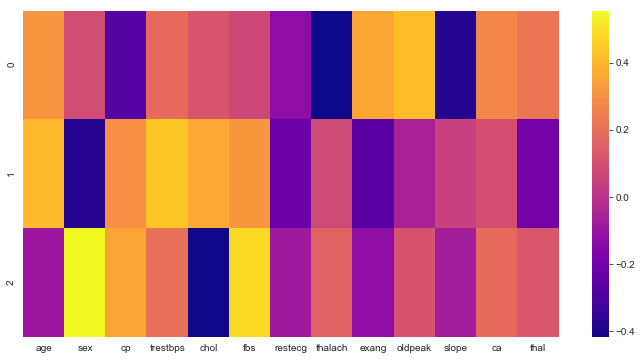

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(comp_df,cmap='plasma',)

From this heatmap, and based on 3D scatter plot, it appears that the attributes 'exang'(exercise induced agnia), 'oldpeak'(ST depression induced by exercise relative to rest), and age were the features that contributed most to the first principal component. 'trestbps' was the feature most responsible for the second principal component, whereas sex was the feature most close related to the third component. 

# Developing a model
From the 3d scatter plot, it appears that dataset is seperable. Because of this, we are going to attempt to classify this dataset using a support vector machine(SVM). Due to the SVM's ability to classify datasets with many features, we apply an SVM onto the original dataset(prior to doing the PCA analysis).

## Creating training and testing data sets ##

In [19]:
# split data into traning set and testing set using train_test_split()
from sklearn.model_selection import train_test_split

X = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# first we must import the SVM model from the svm library
from sklearn.svm import SVC

In [21]:
# create an isntance of the model
hd_SVM = SVC(gamma = 'scale')

In [22]:
# train the model using the training set
hd_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Evaluate Model

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
svm_preds = hd_SVM.predict(X_test)

In [25]:
print(confusion_matrix(y_test, svm_preds))
print('\n')
print(classification_report(y_test, svm_preds))

[[25 20]
 [13 33]]


              precision    recall  f1-score   support

           0       0.66      0.56      0.60        45
           1       0.62      0.72      0.67        46

   micro avg       0.64      0.64      0.64        91
   macro avg       0.64      0.64      0.63        91
weighted avg       0.64      0.64      0.63        91



Based on the classification report, the SVM did not perform as well as we hoped. In an attempt to improve the results, we will perform a gridsearch to find the best parameters possible.

## Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Create a dictionary filled with test parameters for C and gamma
param_grid = dict(
    C = [0.01,0.1,1,10,20,50,100,200,500,1000],
    kernel = ['rbf','sigmoid'],
    gamma = [1,0.1,0.01,0.001,0.0001]
)

In [28]:
# fit the grid model and search for best parameters
grid = GridSearchCV(SVC(), param_grid, verbose = 1)
grid.fit(X_train, y_train)

C:\Users\John\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   13.2s finished
C:\Users\John\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 20, 50, 100, 200, 500, 1000], 'kernel': ['rbf', 'sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [29]:
# check best parameters
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [30]:
grid_preds = grid.predict(X_test)

For comparison, we will display the results from the original SVM again:

In [31]:
print('SVM Results pre-GridSearch')
print('\n')
print('Confusion Matrix: \n')
print(confusion_matrix(y_test, svm_preds))
print('\n')
print('Classification Report: \n')
print(classification_report(y_test, svm_preds))

SVM Results pre-GridSearch


Confusion Matrix: 

[[25 20]
 [13 33]]


Classification Report: 

              precision    recall  f1-score   support

           0       0.66      0.56      0.60        45
           1       0.62      0.72      0.67        46

   micro avg       0.64      0.64      0.64        91
   macro avg       0.64      0.64      0.63        91
weighted avg       0.64      0.64      0.63        91



In [32]:
print('SVM Results post-GridSearch')
print('\n')
print('Confusion Matrix: \n')
print(confusion_matrix(y_test, grid_preds))
print('\n')
print('Classification Report: \n')
print(classification_report(y_test, grid_preds))

SVM Results post-GridSearch


Confusion Matrix: 

[[29 16]
 [ 8 38]]


Classification Report: 

              precision    recall  f1-score   support

           0       0.78      0.64      0.71        45
           1       0.70      0.83      0.76        46

   micro avg       0.74      0.74      0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.74      0.74      0.73        91



# Conclusion
Using gridsearch, it appears we were able to create a model with the ability to predict whether a patient has heart disease with approximately 80% accuracy. It may be possible to improve this metric by including more SVC parameters into the parameters of the grid search. I remain unsatisfied with these results however, and I intend to improve these results through other means, possibly through a neural network or a randomforest classifier. 